In [19]:
import pandas as pd
from datetime import datetime

url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
cv_df = pd.read_csv(url)

print(cv_df.tail(5))

            date          state  fips  cases  deaths
5894  2020-06-17       Virginia    51  55775    1583
5895  2020-06-17     Washington    53  28270    1229
5896  2020-06-17  West Virginia    54   2376      88
5897  2020-06-17      Wisconsin    55  23632     713
5898  2020-06-17        Wyoming    56   1114      18


In [34]:
cv_df['min_date'] = pd.to_datetime('2020-03-01')
cv_df['date'] = pd.to_datetime(cv_df['date'])
cv_df['day_num'] = (cv_df['date'] - cv_df['min_date']).dt.days

In [37]:
cv_df.head()

,date,state,fips,cases,deaths,min_date,day_num
0,2020-01-21,Washington,53,1,0,2020-03-01,-40
1,2020-01-22,Washington,53,1,0,2020-03-01,-39
2,2020-01-23,Washington,53,1,0,2020-03-01,-38
3,2020-01-24,Illinois,17,1,0,2020-03-01,-37
4,2020-01-24,Washington,53,1,0,2020-03-01,-37


In [2]:
states = cv_df['state'].unique()

In [39]:
for i in states:
    temp_df = cv_df[
        [
            'date',
            'day_num',
            'cases',
            'deaths',
            
        ]
    ][cv_df['state'] == 'New York']

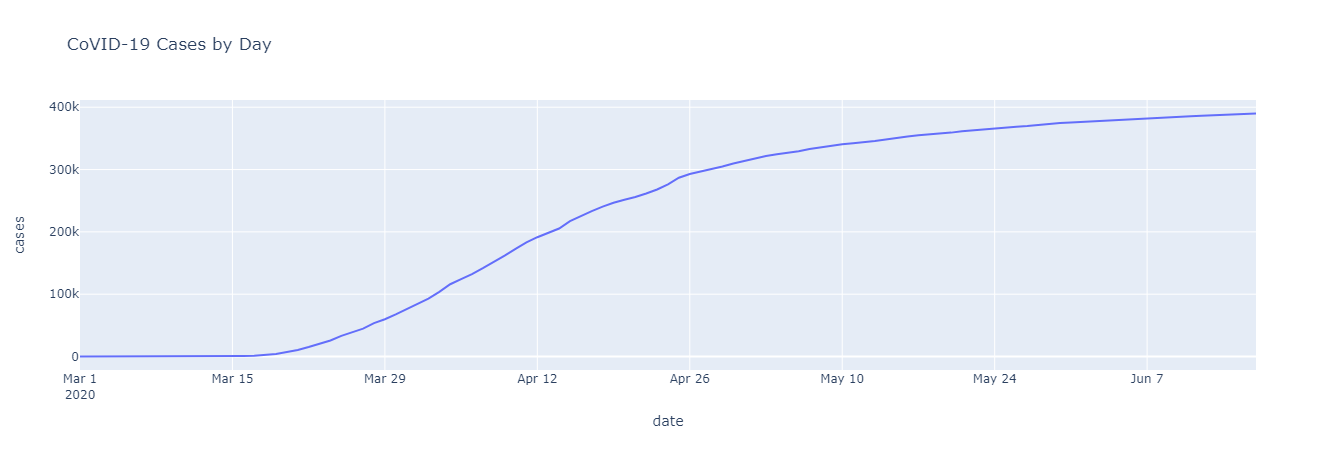

In [40]:
import plotly.express as px

df = temp_df
fig = px.line(temp_df, x="date", y="cases", title='CoVID-19 Cases by Day')
fig.show()

In [27]:
from math import exp

In [28]:
import math
import numpy as np
import pandas as pd
from math import exp

def sc_func(x, a, b, c):
    return a/(1 - b*exp(x)) + c
    
def l_func(x, a, b):
    return a*x + b

def exp_func(x, a, b, c):
    return a*exp(x + b) + c

def log_func(x, a, b):
    a + b*np.log(x) 

In [29]:
from scipy.optimize import curve_fit

In [30]:
temp_df.dtypes

date        datetime64[ns]
day_num    timedelta64[ns]
cases                int64
deaths               int64
dtype: object

In [41]:
curve_fit(
    f = exp_func,
    xdata = temp_df['day_num'],
    ydata = temp_df['cases']
)

TypeError: cannot convert the series to <class 'float'>